In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
    
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 784)


In [ ]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [ ]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
    
g=create_generator()
g.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [ ]:
def create_discriminator():
    discriminator=Sequential()
    
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator

d =create_discriminator()
d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
    
gan = create_gan(d,g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [ ]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    #plt.savefig('gan_generated_image %d.png' %epoch)
    plt.show()

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


100%|██████████| 128/128 [00:18<00:00,  6.85it/s]


Epoch 1


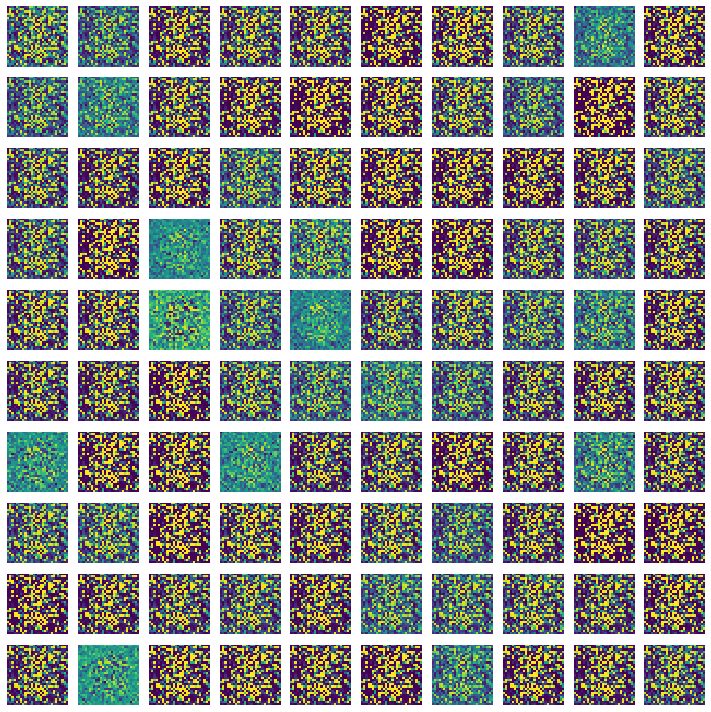

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 2


  1%|          | 1/128 [00:00<00:16,  7.59it/s]

Epoch 2
Epoch 3


  1%|          | 1/128 [00:00<00:16,  7.83it/s]

Epoch 3
Epoch 4


  1%|          | 1/128 [00:00<00:17,  7.42it/s]

Epoch 4
Epoch 5


  1%|          | 1/128 [00:00<00:17,  7.32it/s]

Epoch 5
Epoch 6


  1%|          | 1/128 [00:00<00:16,  7.69it/s]

Epoch 6
Epoch 7


  1%|          | 1/128 [00:00<00:16,  7.63it/s]

Epoch 7
Epoch 8


  1%|          | 1/128 [00:00<00:16,  7.59it/s]

Epoch 8
Epoch 9


  1%|          | 1/128 [00:00<00:17,  7.46it/s]

Epoch 9
Epoch 10


100%|██████████| 128/128 [00:16<00:00,  7.62it/s]


Epoch 10


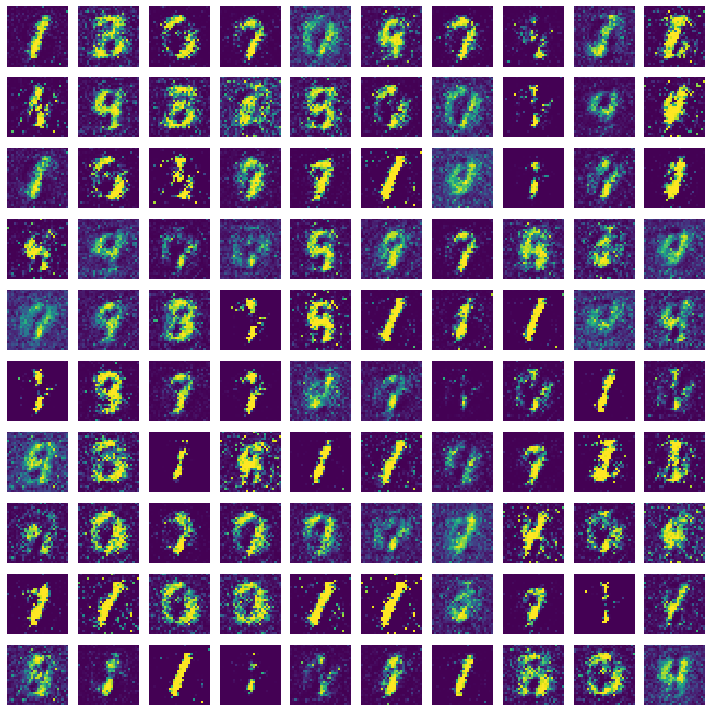

  1%|          | 1/128 [00:00<00:20,  6.15it/s]

Epoch 11


  1%|          | 1/128 [00:00<00:16,  7.69it/s]

Epoch 11
Epoch 12


  1%|          | 1/128 [00:00<00:16,  7.71it/s]

Epoch 12
Epoch 13


  1%|          | 1/128 [00:00<00:16,  7.84it/s]

Epoch 13
Epoch 14


  1%|          | 1/128 [00:00<00:17,  7.37it/s]

Epoch 14
Epoch 15


  1%|          | 1/128 [00:00<00:16,  7.60it/s]

Epoch 15
Epoch 16


  1%|          | 1/128 [00:00<00:16,  7.83it/s]

Epoch 16
Epoch 17


  1%|          | 1/128 [00:00<00:16,  7.58it/s]

Epoch 17
Epoch 18


  1%|          | 1/128 [00:00<00:16,  7.63it/s]

Epoch 18
Epoch 19


  1%|          | 1/128 [00:00<00:16,  7.69it/s]

Epoch 19
Epoch 20


100%|██████████| 128/128 [00:16<00:00,  7.57it/s]


Epoch 20


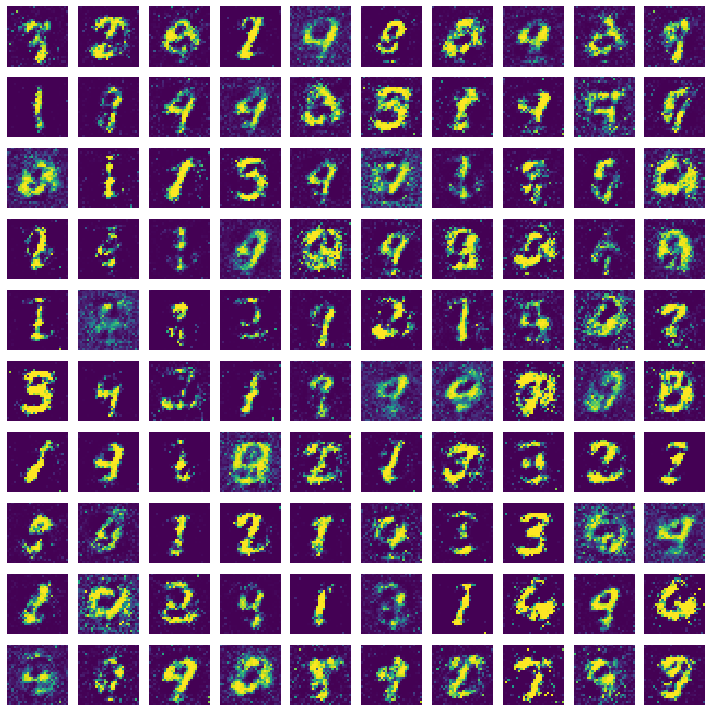

  1%|          | 1/128 [00:00<00:24,  5.26it/s]

Epoch 21


  1%|          | 1/128 [00:00<00:16,  7.84it/s]

Epoch 21
Epoch 22


  1%|          | 1/128 [00:00<00:17,  7.46it/s]

Epoch 22
Epoch 23


  1%|          | 1/128 [00:00<00:16,  7.84it/s]

Epoch 23
Epoch 24


  1%|          | 1/128 [00:00<00:16,  7.82it/s]

Epoch 24
Epoch 25


  1%|          | 1/128 [00:00<00:16,  7.89it/s]

Epoch 25
Epoch 26


  1%|          | 1/128 [00:00<00:16,  7.77it/s]

Epoch 26
Epoch 27


  1%|          | 1/128 [00:00<00:15,  7.98it/s]

Epoch 27
Epoch 28


  1%|          | 1/128 [00:00<00:16,  7.57it/s]

Epoch 28
Epoch 29


  1%|          | 1/128 [00:00<00:16,  7.55it/s]

Epoch 29
Epoch 30


100%|██████████| 128/128 [00:16<00:00,  7.75it/s]


Epoch 30


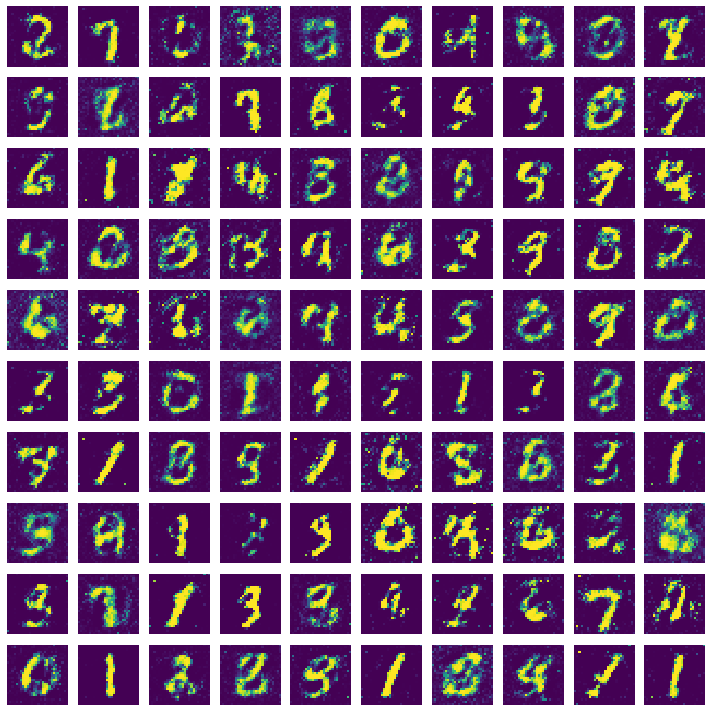

  1%|          | 1/128 [00:00<00:19,  6.41it/s]

Epoch 31


  1%|          | 1/128 [00:00<00:16,  7.88it/s]

Epoch 31
Epoch 32


  1%|          | 1/128 [00:00<00:15,  7.97it/s]

Epoch 32
Epoch 33


  1%|          | 1/128 [00:00<00:16,  7.65it/s]

Epoch 33
Epoch 34


  1%|          | 1/128 [00:00<00:15,  8.05it/s]

Epoch 34
Epoch 35


  1%|          | 1/128 [00:00<00:16,  7.89it/s]

Epoch 35
Epoch 36


  1%|          | 1/128 [00:00<00:17,  7.39it/s]

Epoch 36
Epoch 37


  1%|          | 1/128 [00:00<00:16,  7.88it/s]

Epoch 37
Epoch 38


  1%|          | 1/128 [00:00<00:16,  7.53it/s]

Epoch 38
Epoch 39


  1%|          | 1/128 [00:00<00:16,  7.92it/s]

Epoch 39
Epoch 40


100%|██████████| 128/128 [00:16<00:00,  7.73it/s]


Epoch 40


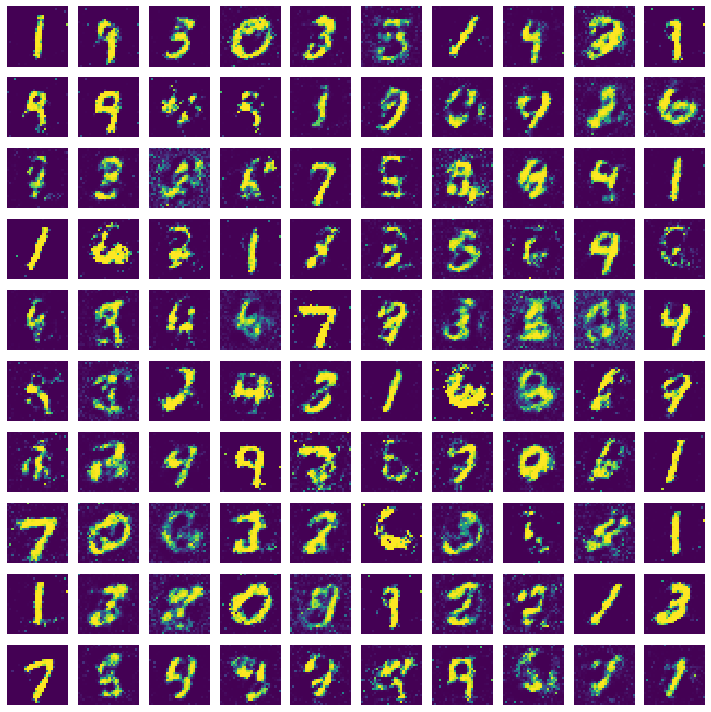

  1%|          | 1/128 [00:00<00:20,  6.18it/s]

Epoch 41


  1%|          | 1/128 [00:00<00:16,  7.70it/s]

Epoch 41
Epoch 42


  1%|          | 1/128 [00:00<00:16,  7.56it/s]

Epoch 42
Epoch 43


  1%|          | 1/128 [00:00<00:16,  7.85it/s]

Epoch 43
Epoch 44


  1%|          | 1/128 [00:00<00:15,  7.98it/s]

Epoch 44
Epoch 45


  1%|          | 1/128 [00:00<00:16,  7.71it/s]

Epoch 45
Epoch 46


  1%|          | 1/128 [00:00<00:15,  8.00it/s]

Epoch 46
Epoch 47


  1%|          | 1/128 [00:00<00:16,  7.73it/s]

Epoch 47
Epoch 48


  1%|          | 1/128 [00:00<00:16,  7.73it/s]

Epoch 48
Epoch 49


  1%|          | 1/128 [00:00<00:17,  7.19it/s]

Epoch 49
Epoch 50


100%|██████████| 128/128 [00:16<00:00,  7.72it/s]


Epoch 50


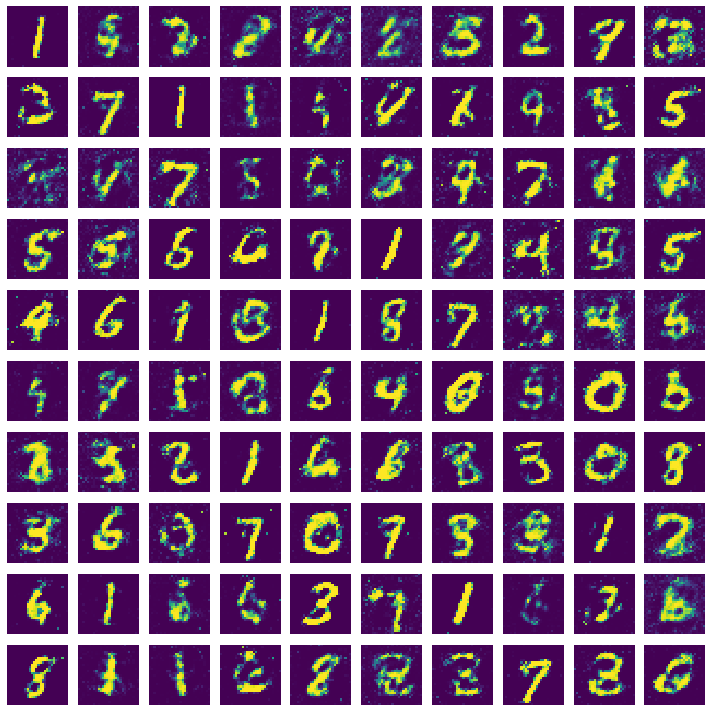

  1%|          | 1/128 [00:00<00:20,  6.29it/s]

Epoch 51


  1%|          | 1/128 [00:00<00:17,  7.33it/s]

Epoch 51
Epoch 52


  1%|          | 1/128 [00:00<00:16,  7.91it/s]

Epoch 52
Epoch 53


  1%|          | 1/128 [00:00<00:16,  7.76it/s]

Epoch 53
Epoch 54


  1%|          | 1/128 [00:00<00:15,  7.97it/s]

Epoch 54
Epoch 55


  1%|          | 1/128 [00:00<00:15,  8.01it/s]

Epoch 55
Epoch 56


  1%|          | 1/128 [00:00<00:16,  7.80it/s]

Epoch 56
Epoch 57


  1%|          | 1/128 [00:00<00:15,  8.03it/s]

Epoch 57
Epoch 58


  1%|          | 1/128 [00:00<00:17,  7.37it/s]

Epoch 58
Epoch 59


  1%|          | 1/128 [00:00<00:16,  7.59it/s]

Epoch 59
Epoch 60


100%|██████████| 128/128 [00:16<00:00,  7.74it/s]


Epoch 60


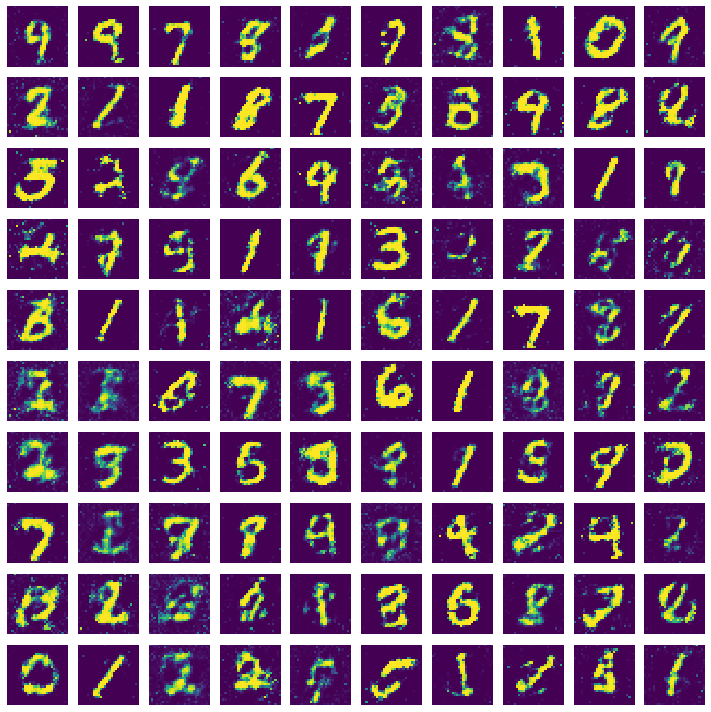

  1%|          | 1/128 [00:00<00:24,  5.28it/s]

Epoch 61


  1%|          | 1/128 [00:00<00:15,  8.13it/s]

Epoch 61
Epoch 62


  1%|          | 1/128 [00:00<00:16,  7.50it/s]

Epoch 62
Epoch 63


  1%|          | 1/128 [00:00<00:16,  7.50it/s]

Epoch 63
Epoch 64


  1%|          | 1/128 [00:00<00:16,  7.70it/s]

Epoch 64
Epoch 65


  1%|          | 1/128 [00:00<00:15,  8.00it/s]

Epoch 65
Epoch 66


  1%|          | 1/128 [00:00<00:16,  7.85it/s]

Epoch 66
Epoch 67


  1%|          | 1/128 [00:00<00:16,  7.80it/s]

Epoch 67
Epoch 68


  1%|          | 1/128 [00:00<00:16,  7.82it/s]

Epoch 68
Epoch 69


  1%|          | 1/128 [00:00<00:16,  7.87it/s]

Epoch 69
Epoch 70


100%|██████████| 128/128 [00:16<00:00,  7.69it/s]


Epoch 70


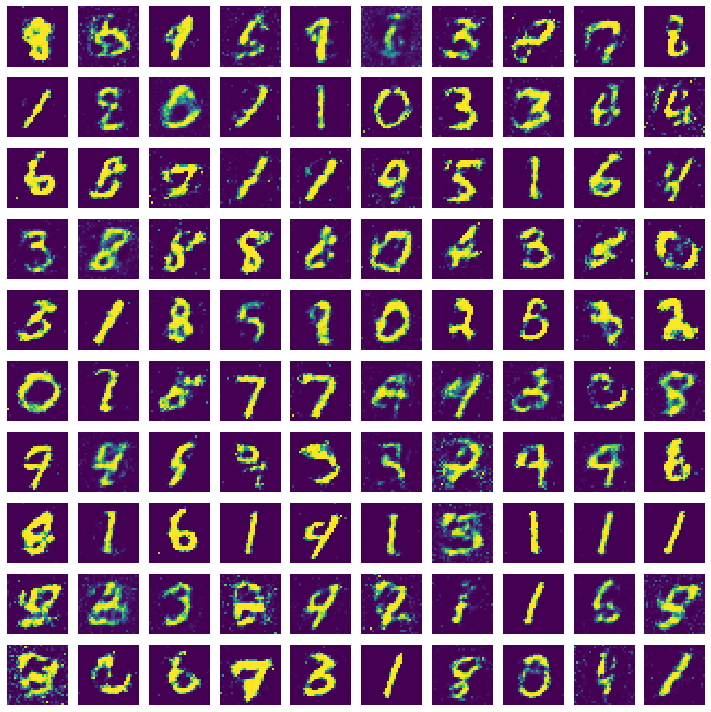

  1%|          | 1/128 [00:00<00:19,  6.52it/s]

Epoch 71


  1%|          | 1/128 [00:00<00:16,  7.89it/s]

Epoch 71
Epoch 72


  1%|          | 1/128 [00:00<00:15,  8.01it/s]

Epoch 72
Epoch 73


  1%|          | 1/128 [00:00<00:15,  8.08it/s]

Epoch 73
Epoch 74


  1%|          | 1/128 [00:00<00:16,  7.68it/s]

Epoch 74
Epoch 75


  1%|          | 1/128 [00:00<00:17,  7.41it/s]

Epoch 75
Epoch 76


  1%|          | 1/128 [00:00<00:16,  7.86it/s]

Epoch 76
Epoch 77


  1%|          | 1/128 [00:00<00:16,  7.52it/s]

Epoch 77
Epoch 78


  1%|          | 1/128 [00:00<00:16,  7.75it/s]

Epoch 78
Epoch 79


  1%|          | 1/128 [00:00<00:17,  7.39it/s]

Epoch 79
Epoch 80


100%|██████████| 128/128 [00:16<00:00,  7.69it/s]


Epoch 80


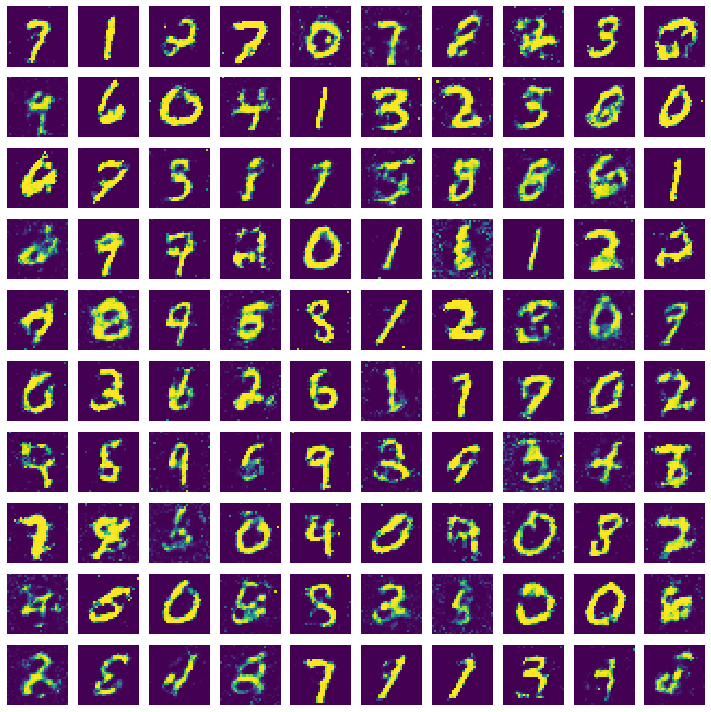

  1%|          | 1/128 [00:00<00:19,  6.55it/s]

Epoch 81


  1%|          | 1/128 [00:00<00:16,  7.74it/s]

Epoch 81
Epoch 82


  1%|          | 1/128 [00:00<00:16,  7.92it/s]

Epoch 82
Epoch 83


  1%|          | 1/128 [00:00<00:16,  7.70it/s]

Epoch 83
Epoch 84


  1%|          | 1/128 [00:00<00:17,  7.24it/s]

Epoch 84
Epoch 85


  1%|          | 1/128 [00:00<00:15,  7.95it/s]

Epoch 85
Epoch 86


  1%|          | 1/128 [00:00<00:16,  7.86it/s]

Epoch 86
Epoch 87


  1%|          | 1/128 [00:00<00:16,  7.48it/s]

Epoch 87
Epoch 88


  1%|          | 1/128 [00:00<00:16,  7.93it/s]

Epoch 88
Epoch 89


  1%|          | 1/128 [00:00<00:16,  7.83it/s]

Epoch 89
Epoch 90


100%|██████████| 128/128 [00:16<00:00,  7.73it/s]


Epoch 90


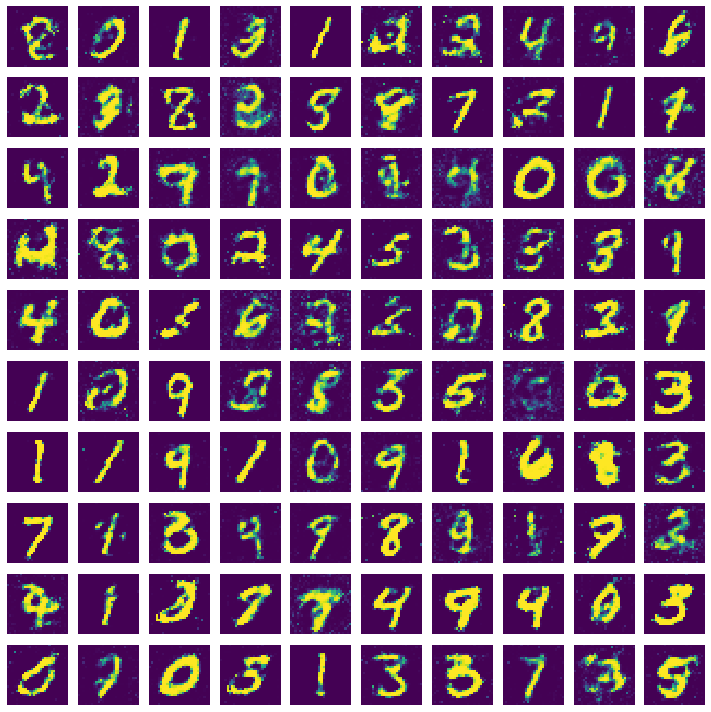

  1%|          | 1/128 [00:00<00:20,  6.11it/s]

Epoch 91


  1%|          | 1/128 [00:00<00:15,  7.96it/s]

Epoch 91
Epoch 92


  1%|          | 1/128 [00:00<00:16,  7.73it/s]

Epoch 92
Epoch 93


  1%|          | 1/128 [00:00<00:16,  7.48it/s]

Epoch 93
Epoch 94


  1%|          | 1/128 [00:00<00:16,  7.89it/s]

Epoch 94
Epoch 95


  1%|          | 1/128 [00:00<00:16,  7.78it/s]

Epoch 95
Epoch 96


  1%|          | 1/128 [00:00<00:15,  7.95it/s]

Epoch 96
Epoch 97


  1%|          | 1/128 [00:00<00:16,  7.54it/s]

Epoch 97
Epoch 98


  1%|          | 1/128 [00:00<00:16,  7.65it/s]

Epoch 98
Epoch 99


  1%|          | 1/128 [00:00<00:15,  8.16it/s]

Epoch 99
Epoch 100


100%|██████████| 128/128 [00:16<00:00,  7.70it/s]


Epoch 100


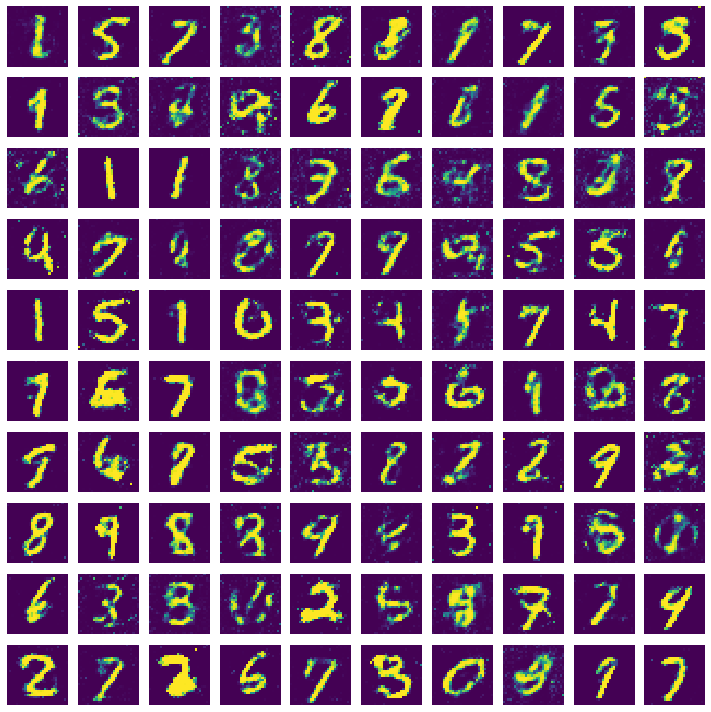

GAN 최적화 완료!


In [ ]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
        print("Epoch %d" %e)
        if e == 1 or e % 10 == 0:           
            plot_generated_images(e, generator)

training(100,128)
print('GAN 최적화 완료!')